# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


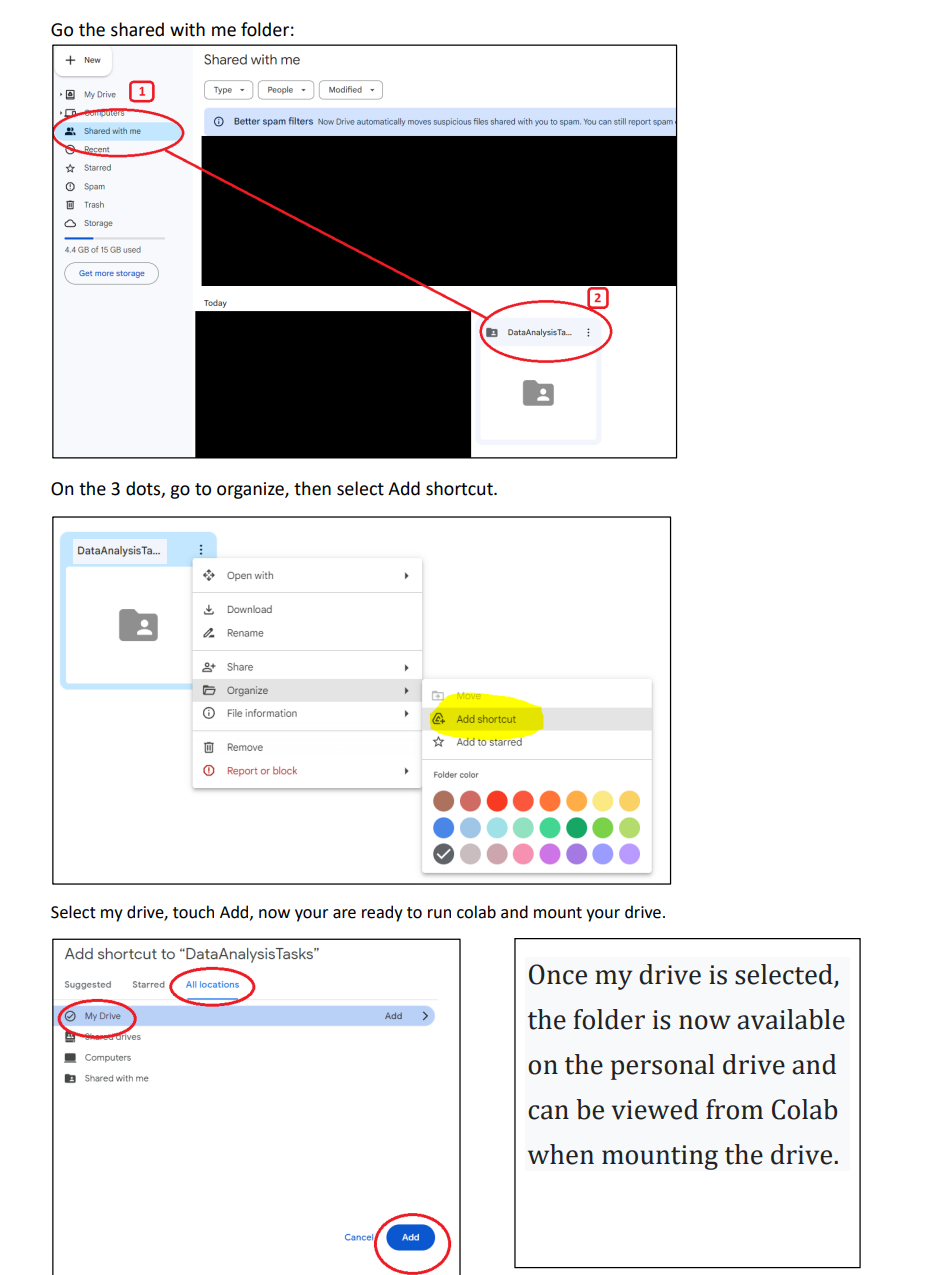

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/automobile.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








## 1. Data Manipulation

**Prompt**:

I will provide you with data related to Bigfoot Sightings. I need to divide the column "timestamp" into two columns, "date" and "time", and add these new columns to the original dataframe.
Then, I need to make clusters with a defined pattern for each sighting. Follow the next rules:

- Look in the values from column "date" and compare each date with the next date. If the first date has a difference of days <= 3 days, maintain the date in the new cluster (to store a new cluster of dates, add a column for the cluster).
- In a cluster, you can have 2 or more dates that are all within the 3 days of range between them. If the first date is, for example, 01-01-1960, and the second date is 01-03-1960, both dates make a cluster. But if there's a third date 01-05-1960 and this one has a difference of less than 3 days compared with the last date taken in the cluster (01-03-1960), also this new third date will be saved in the same cluster, although the difference of days between this last date and the first day of the cluster is larger than 3 days.
- The addition of new clusters is allowed when the difference between the last date saved in the previous cluster differs in more than 3 days from the next date, and the consecutive date is less than 3 days different from the previous one. If it doesn't happen, the cluster can't be created until 2 dates differ in the range of 3 days.

For all these rules, can you display a scatter plot showing all the founded clusters along the US longitude and latitude coordinates? Because you'll have several clusters obtained throughout the years, plot the reference legend at the bottom and middle of the main plot.

Share with me the Python code.

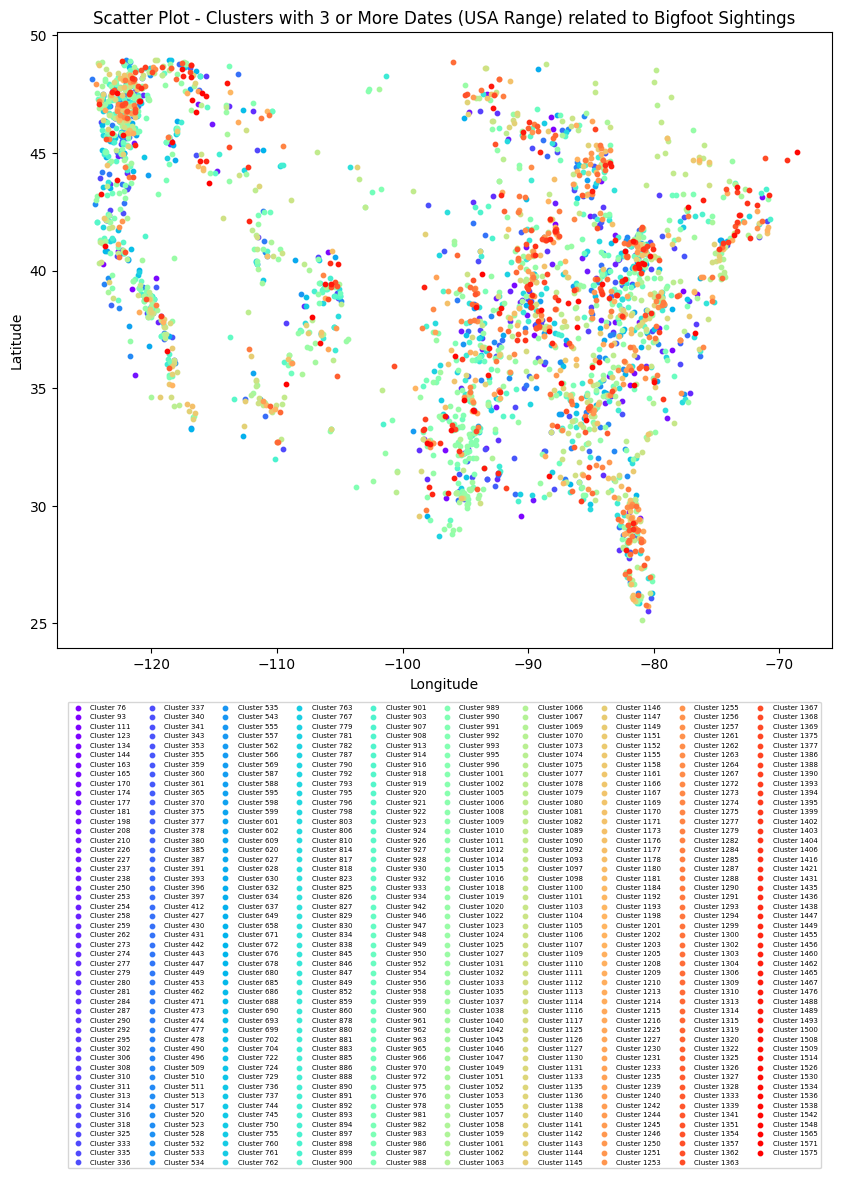

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data_file = '/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/bigfoot_locations.csv'

# Convert the data into a DataFrame
df = pd.read_csv(data_file, low_memory=False)

# Convert the "timestamp" column to a proper datetime format with 'coerce' option
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

# Sort the DataFrame by 'timestamp' in ascending order
df = df.sort_values(by='timestamp')

# Split 'timestamp' into 'date' and 'time' columns
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

# Initialize cluster dictionary
cluster_dict = {}
current_cluster = 0
last_timestamp = None

# Iterate through the DataFrame to create clusters
for index, row in df.iterrows():
    if last_timestamp is None or (row['timestamp'] - last_timestamp).days <= 3:
        cluster_dict[index] = current_cluster
    else:
        current_cluster += 1
        cluster_dict[index] = current_cluster
    last_timestamp = row['timestamp']

# Add the cluster information back to the DataFrame
df['cluster'] = df.index.map(cluster_dict)

# Count the number of dates in each cluster
cluster_counts = df['cluster'].value_counts()

# Filter clusters with 3 or more dates
clusters_to_keep = cluster_counts[cluster_counts >= 3].index
df = df[df['cluster'].isin(clusters_to_keep)]

# Define latitude and longitude range for the USA
usa_latitude_range = (24, 49)  # Latitude range for the contiguous USA
usa_longitude_range = (-125, -67)  # Longitude range for the contiguous USA

# Generate a list of distinct colors
colors = plt.cm.rainbow([i / float(len(df['cluster'].unique())) for i in range(len(df['cluster'].unique()))])

# Plot all clusters on the same scatter plot within the USA range
plt.figure(figsize=(10, 8))
ax = plt.gca()  # Get the current axes

for i, cluster_num in enumerate(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_num]
    usa_cluster_data = cluster_data[
        (cluster_data['latitude'] >= usa_latitude_range[0]) & (cluster_data['latitude'] <= usa_latitude_range[1]) &
        (cluster_data['longitude'] >= usa_longitude_range[0]) & (cluster_data['longitude'] <= usa_longitude_range[1])
    ]
    ax.scatter(usa_cluster_data['longitude'], usa_cluster_data['latitude'], color=colors[i], s=10, label=f'Cluster {cluster_num}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot - Clusters with 3 or More Dates (USA Range) related to Bigfoot Sightings')

# Add a legend
pos = ax.get_position()
#ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.85),
    ncol=10,
    fontsize = 5
)

plt.show()

**Response (model)**:

Sure, here is the scatter plot related to clusters found in US longitude and latitude coordinates:

[image od the query]

And here is the code:

[CODE]

I hope this is helpful!